# Задание

Дорогой студент!

В домашнем задании Ultra Pro занятия по обработке тектсов с помощью НС мы ставим задачу распознать уже не 6, как ранее, а целых 20 русских писателей! Это подразумевает и больший размер базы для обучения соответственно. Ячейка для скачивания базы уже включена в ноутбук задания.


 В задании необходимо выполнить следующие пункты:

  1. Загрузить саму базу по ссылке и подговить файлы базы для обработки.
  2. Создать обучающую и проверочную выборки, обратив особое внимание на балансировку базы: количество примеров каждого класса должно быть примерно одного порядка. При этом для разбивки необходимо применить цикл. Проверочная выборка должна быть 20% от общей выборки.
  3. Подготовьте выборки для обучения и обучите сеть. Добейтесь результата точности сети не менее 95% на проверочной выборке модели Bag of Words и 75-80% - для модели Embedding.
   


# Решение

## Загрузка и распаковка данных

In [ ]:
import gdown                                      # Подключим функцию gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/20writers.zip', None, quiet=True)      # Скачивание файла

'20writers.zip'

In [ ]:
!unzip -q 20writers.zip -d 20writers

replace 20writers/Грибоедов.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
import os

DIR_PATH = '/content/20writers/'

## Подготовка выборки

### Запись в список всех текстов всех авторов

In [ ]:
LABELS = []
COUNT_LABELS = 0

In [ ]:
for cls in os.listdir(DIR_PATH):
    len_label = len(cls)
    LABELS.append(cls[:len_label - 4:])

LABELS = sorted(LABELS)
COUNT_LABELS = len(LABELS)

print(LABELS)
print(COUNT_LABELS)

['Беляев', 'Булгаков', 'Васильев', 'Гоголь', 'Гончаров', 'Горький', 'Грибоедов', 'Достоевский', 'Каверин', 'Катаев', 'Куприн', 'Лермонтов', 'Лесков', 'Носов', 'Пастернак', 'Пушкин', 'Толстой', 'Тургенев', 'Чехов', 'Шолохов']
20


In [ ]:
def read_file(file_name):
    read_file = open(file_name, 'r')
    text = read_file.read()
    text = text.replace('\n', ' ')
    return text

In [ ]:
DATA = []

In [ ]:
for filename in sorted(os.listdir(DIR_PATH)):
    DATA.append(read_file(DIR_PATH + filename))
    print(f'{filename} добавлен в выборку')

Беляев.txt добавлен в выборку
Булгаков.txt добавлен в выборку
Васильев.txt добавлен в выборку
Гоголь.txt добавлен в выборку
Гончаров.txt добавлен в выборку
Горький.txt добавлен в выборку
Грибоедов.txt добавлен в выборку
Достоевский.txt добавлен в выборку
Каверин.txt добавлен в выборку
Катаев.txt добавлен в выборку
Куприн.txt добавлен в выборку
Лермонтов.txt добавлен в выборку
Лесков.txt добавлен в выборку
Носов.txt добавлен в выборку
Пастернак.txt добавлен в выборку
Пушкин.txt добавлен в выборку
Толстой.txt добавлен в выборку
Тургенев.txt добавлен в выборку
Чехов.txt добавлен в выборку
Шолохов.txt добавлен в выборку


In [ ]:
f = open('/content/20writers/Беляев.txt', 'r')
print(f.read(50))

print()

print(DATA[0][:50])
print(len(DATA[0]))

﻿Часть первая

I. На палубе


Большой трансатланти

﻿Часть первая  I. На палубе   Большой трансатланти
2255254


### Визуализация межклассового баланса

In [ ]:
texts_len = [len(DATA[i]) for i in range(COUNT_LABELS)]
print(texts_len)

[2255254, 2001064, 2952792, 1965119, 3104712, 2523380, 969109, 5178950, 1992830, 2579246, 2328900, 1972541, 2152214, 2399413, 3089426, 3408339, 3357061, 1980206, 6611627, 3386268]


<BarContainer object of 20 artists>

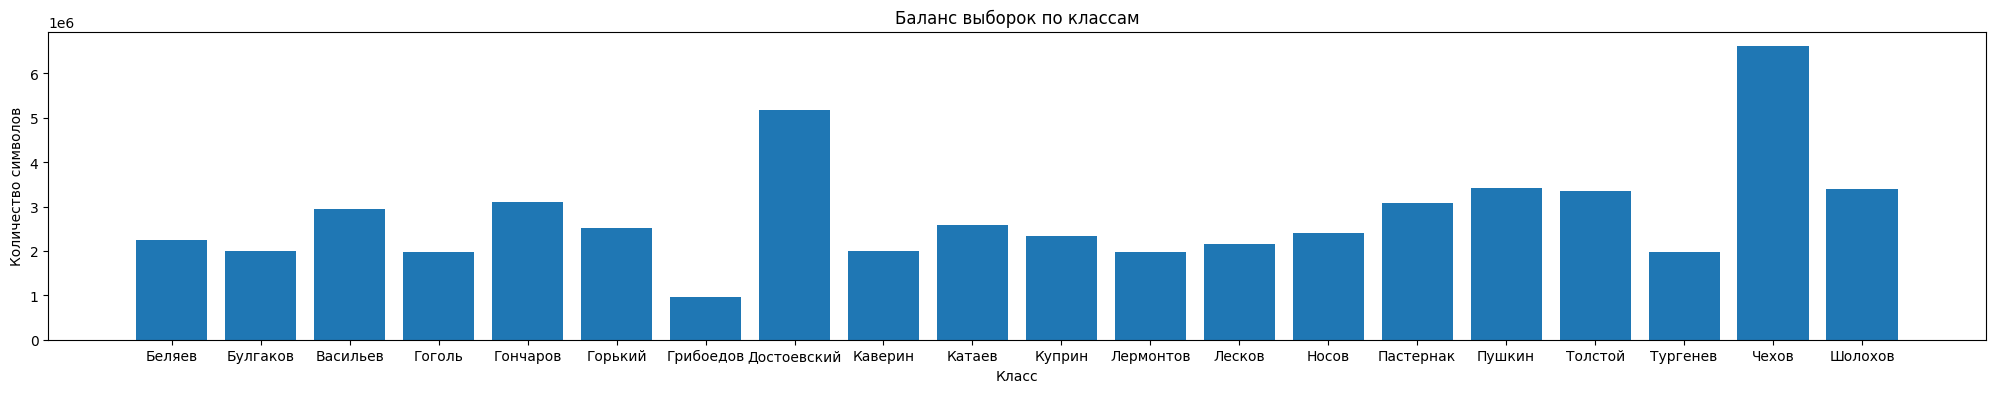

In [ ]:
# Визуализация баланса выборок по классам

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# df = pd.DataFrame(texts_len, LABELS)

fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot()
ax.set_title('Баланс выборок по классам')

x = np.array(LABELS)
y = np.array(texts_len)
# ax.annotate([i for i in texts_len], (x, y))

ax.set_xlabel('Класс')
ax.set_ylabel('Количество символов')
ax.bar(x, y)

Виден небольшой дисбаланс, попробуем не изменять размер выборок

### Деление на тестовую выборку и обучающую

In [ ]:
# Запись в отдельный список количества 80% выборки каждого класса в символах
print(texts_len)

percentage_80 = [(i - round(i/5)) for i in texts_len]

print(percentage_80)

[2255254, 2001064, 2952792, 1965119, 3104712, 2523380, 969109, 5178950, 1992830, 2579246, 2328900, 1972541, 2152214, 2399413, 3089426, 3408339, 3357061, 1980206, 6611627, 3386268]
[1804203, 1600851, 2362234, 1572095, 2483770, 2018704, 775287, 4143160, 1594264, 2063397, 1863120, 1578033, 1721771, 1919530, 2471541, 2726671, 2685649, 1584165, 5289302, 2709014]


In [ ]:
train_data = []
test_data = []

for i in range(COUNT_LABELS):
    train_data.append(DATA[i][:percentage_80[i]])
    test_data.append(DATA[i][percentage_80[i]:])

In [ ]:
print(f'Количество элементов в train_data: {len(train_data)}')
print(f'Тип train_data: {type(train_data)}')
print(f'Тип данных первого элемента: {type(train_data[0])}')
print()
print(f'Общая длина первого элемента: {len(DATA[0])}')
print(f'80% длины первого элемента: {len(train_data[0])}')
print(f'Отрывок из первого текста обучающей выборки: {train_data[0][:26]}')

Количество элементов в train_data: 20
Тип train_data: <class 'list'>
Тип данных первого элемента: <class 'str'>

Общая длина первого элемента: 2255254
80% длины первого элемента: 1804203
Отрывок из первого текста обучающей выборки: ﻿Часть первая  I. На палуб


In [ ]:
print(f'Количество элементов в test_data: {len(test_data)}')
print(f'Тип test_data: {type(test_data)}')
print(f'Тип данных первого элемента: {type(test_data[0])}')
print()
print(f'Общая длина первого элемента: {len(DATA[0])}')
print(f'80% длины первого элемента: {len(test_data[0])}')
print(f'Отрывок из первого текста тестовой выборки: {test_data[0][:26]}')

Количество элементов в test_data: 20
Тип test_data: <class 'list'>
Тип данных первого элемента: <class 'str'>

Общая длина первого элемента: 2255254
80% длины первого элемента: 451051
Отрывок из первого текста тестовой выборки: внул головой с видом докто


### Скармливаем выборки токенайзеру
- Чтобы создать словарь частности
- Матрицу последовательности

In [ ]:
# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation 

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [ ]:
# Максимальное количество слов
maxWordsCount = 15000

# Сохраним Токенайзер в одноименной переменной
tokenizer = Tokenizer(num_words=maxWordsCount,                                        # Максимальное кол-во слов                                       
                      filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff',  # Фильтры исходного текста 
                      lower=True, split=' ',                                          # Все буквы к нижнему регистру, разделение слов пробелом
                      oov_token='unknown',                                            # Один лейбл для всех незнакомых слов
                      char_level=False)                                               # Без выравнивания символов

Создаем словарь частности

In [ ]:
# Создание словаря частотности по каждой выборке
tokenizer.fit_on_texts(train_data)
tokenizer.fit_on_texts(test_data)

example = list(tokenizer.word_index.items())
print(example[:15])

[('unknown', 1), ('и', 2), ('в', 3), ('не', 4), ('на', 5), ('что', 6), ('с', 7), ('я', 8), ('он', 9), ('а', 10), ('как', 11), ('то', 12), ('его', 13), ('к', 14), ('но', 15)]


Переводим словарь частности в последовательность индексов

In [ ]:
# Функция texts_to_sequences() возвращает только массив индексов
train_sequence = tokenizer.texts_to_sequences(train_data)
test_sequence = tokenizer.texts_to_sequences(test_data)

In [ ]:
# Посмотрим первые 15 индексов слов oбучающей и тестовой выборок
print(f'Кол-во индексов первого текста обучающей выборки: {len(train_sequence[0])}')
print(f'Кол-во индексов первого текста тестовой выборки:  {len(test_sequence[0])}') 
print(f'Первые 15 индексов первого текста обучающей выборки: {train_sequence[0][:15]}')
print(f'Первые 15 индексов первого текста тестовой выборки: {test_sequence[0][:15]}')

Кол-во индексов первого текста обучающей выборки: 269587
Кол-во индексов первого текста тестовой выборки:  67439
Первые 15 индексов первого текста обучающей выборки: [727, 1201, 1558, 5, 4432, 403, 1, 2456, 1, 1, 289, 3, 1, 12410, 8808]
Первые 15 индексов первого текста тестовой выборки: [1, 259, 7, 958, 1041, 9134, 249, 1, 10, 39, 6, 27, 3404, 8, 3219]


### Деление выборки на примеры
Для увеличения примеров

In [ ]:
def split_sequence(sequence,   # Последовательность индексов
                   win_size,   # Размер окна для деления на примеры
                   hop):       # Шаг окна

    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]

In [ ]:
def vectorize_sequence(seq_list,    # Список последовательностей индексов 
                       win_size,    # Размер окна для деления на примеры
                       hop):        # Шаг окна

    # В списке последовательности следуют в порядке их классов (их кол-во сповпадает с кол-вом классов)
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):

        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)

        # Добавление отрезков в выборку

        x += vectors
        
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# Длина каждого отрезка индексов
sample_len = 1000

# Длина шага по исходному массиву индексов                                                      
step = 500

# Делим на выборки                                                             
x_train, y_train = vectorize_sequence(train_sequence, sample_len, step) 
x_test, y_test = vectorize_sequence(test_sequence, sample_len, step)

In [ ]:
# Выведем размерности всех выборок
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13826, 1000)
(13826, 20)
(3452, 1000)
(3452, 20)


## Создание последовательности индексов с помощью Bag of Words

In [ ]:
# Выборка для обучения                                                           
x_train_BoW = tokenizer.sequences_to_matrix(x_train.tolist())

# Выборка для проверки  
x_test_BoW = tokenizer.sequences_to_matrix(x_test.tolist())

### Создание и обучение модели НС

In [ ]:
modelBoW = Sequential()                                    # Создаём полносвязную сеть для обучения на Bag of Words
# modelBoW.add(BatchNormalization(input_dim=maxWordsCount))  # Слой пакетной нормализации
modelBoW.add(Dense(80,  input_dim=maxWordsCount, activation="relu"))                # Полносвязный слой
modelBoW.add(Dropout(0.8))                                 # Слой регуляризации Dropout
modelBoW.add(Dense(20, activation="relu"))                 # Полносвязный слой
modelBoW.add(Dense(20, activation='sigmoid'))              # Выходной полносвязный слой

modelBoW.compile(optimizer='adam',                         # Компиляция модели
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
modelBoW.summary()                                         # Обобщение информации по модели

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                1200080   
                                                                 
 dropout_10 (Dropout)        (None, 80)                0         
                                                                 
 dense_37 (Dense)            (None, 20)                1620      
                                                                 
 dense_38 (Dense)            (None, 20)                420       
                                                                 
Total params: 1,202,120
Trainable params: 1,202,120
Non-trainable params: 0
_________________________________________________________________


Epoch 1/25
217/217 [==============================] - 3s 9ms/step - loss: 2.4568 - accuracy: 0.2345 - val_loss: 1.5140 - val_accuracy: 0.6834
Epoch 2/25
217/217 [==============================] - 1s 6ms/step - loss: 1.5810 - accuracy: 0.4628 - val_loss: 0.7826 - val_accuracy: 0.8673
Epoch 3/25
217/217 [==============================] - 1s 6ms/step - loss: 1.1587 - accuracy: 0.5919 - val_loss: 0.4560 - val_accuracy: 0.9148
Epoch 4/25
217/217 [==============================] - 1s 7ms/step - loss: 0.9605 - accuracy: 0.6537 - val_loss: 0.3512 - val_accuracy: 0.9392
Epoch 5/25
217/217 [==============================] - 1s 7ms/step - loss: 0.8273 - accuracy: 0.6943 - val_loss: 0.2930 - val_accuracy: 0.9418
Epoch 6/25
217/217 [==============================] - 1s 5ms/step - loss: 0.7471 - accuracy: 0.7241 - val_loss: 0.2680 - val_accuracy: 0.9409
Epoch 7/25
217/217 [==============================] - 1s 5ms/step - loss: 0.6759 - accuracy: 0.7484 - val_loss: 0.2500 - val_accuracy: 0.9424
Epoch 

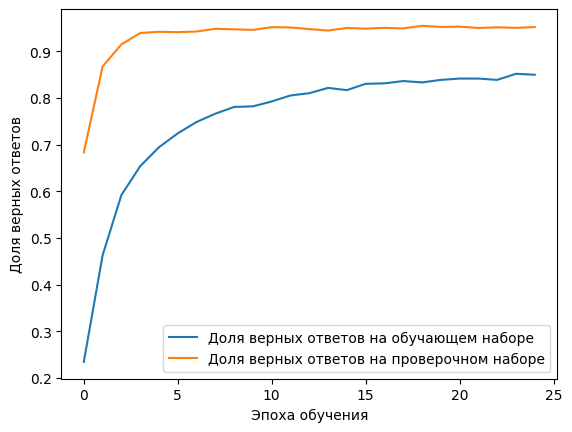

In [ ]:
# Обучение сети Bag of Words
history = modelBoW.fit(x_train_BoW, 
                      y_train, 
                      epochs=25,
                      batch_size=64,
                      validation_data=(x_test_BoW, y_test))

# Отрисовка графика точностей обучения по эпохам
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
val_accuracy = str(round(max(history.history['val_accuracy']) * 100, 2))
val_accuracy += ' %'
val_loss = str(round(min(history.history['val_loss']) * 100, 2))
val_loss += ' %'

df = pd.DataFrame(
    {'val_accuracy': [val_accuracy],
     'val_loss': [val_loss]
     }, index=['Bag of Words'])

print(df)

             val_accuracy val_loss
Bag of Words      95.45 %   20.3 %


## Создаём линейную модель сети для обучения c **Embedding-слоем**:

In [ ]:
modelEmb = Sequential()                                               # Создаём последовательную модель нейросети 
modelEmb.add(Embedding(maxWordsCount, 60, input_length=sample_len))   # Слой Embedding (c указанием размерности вектора и длины входных данных)
modelEmb.add(BatchNormalization())                                    # Добавляем слой нормализации данных
modelEmb.add(Dense(20))                                               # Полносвязный слой
modelEmb.add(Dropout(0.7))                                            # Слой регуляризации Dropout
modelEmb.add(Flatten())                                               # Выравнивающий слой
modelEmb.add(Dense(20, activation='sigmoid'))                         # Полносвязный выходной слой на 6 нейронов

modelEmb.compile(optimizer='rmsprop',                                 # Компиляция модели
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

modelEmb.summary()                                                    # Обобщение информации по модели

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 60)          900000    
                                                                 
 batch_normalization_5 (Batc  (None, 1000, 60)         240       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 1000, 20)          1220      
                                                                 
 dropout_5 (Dropout)         (None, 1000, 20)          0         
                                                                 
 flatten_1 (Flatten)         (None, 20000)             0         
                                                                 
 dense_14 (Dense)            (None, 20)                400020    
                                                      

Epoch 1/20
217/217 [==============================] - 4s 20ms/step - loss: 0.0675 - accuracy: 0.9816 - val_loss: 1.5382 - val_accuracy: 0.7442
Epoch 2/20
217/217 [==============================] - 3s 13ms/step - loss: 0.0513 - accuracy: 0.9869 - val_loss: 1.6377 - val_accuracy: 0.7514
Epoch 3/20
217/217 [==============================] - 3s 13ms/step - loss: 0.0565 - accuracy: 0.9855 - val_loss: 1.6281 - val_accuracy: 0.7373
Epoch 4/20
217/217 [==============================] - 2s 11ms/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 1.5018 - val_accuracy: 0.7659
Epoch 5/20
217/217 [==============================] - 3s 13ms/step - loss: 0.0517 - accuracy: 0.9858 - val_loss: 1.4517 - val_accuracy: 0.7761
Epoch 6/20
217/217 [==============================] - 3s 12ms/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 1.5755 - val_accuracy: 0.7572
Epoch 7/20
217/217 [==============================] - 2s 10ms/step - loss: 0.0495 - accuracy: 0.9868 - val_loss: 1.4255 - val_accuracy: 0.7688

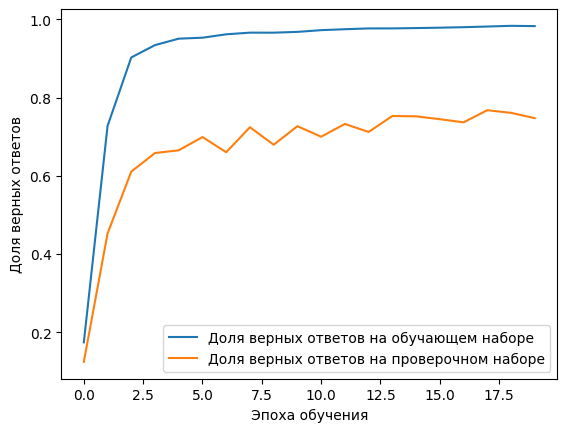

In [ ]:
# Обучение сети Embedding + Dense
history2 = modelEmb.fit(x_train, y_train, 
                    epochs=20, batch_size=64, 
                    validation_data=(x_test, y_test))

# Отрисовка графика точностей обучения по эпохам
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Результаты

In [ ]:
val_accuracy = str(round(max(history2.history['val_accuracy']) * 100, 2))
val_accuracy += ' %'
val_loss = str(round(min(history2.history['val_loss']) * 100, 2))
val_loss += ' %'

df2 = pd.DataFrame(
    {'val_accuracy': [val_accuracy],
     'val_loss': [val_loss]
     }, index=['Embedding'])

df3 = pd.concat([df, df2])

print(df3)

             val_accuracy  val_loss
Bag of Words      95.45 %    20.3 %
Embedding         79.29 %  138.88 %


Задача решена